In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data= iris.drop(['Id'],axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


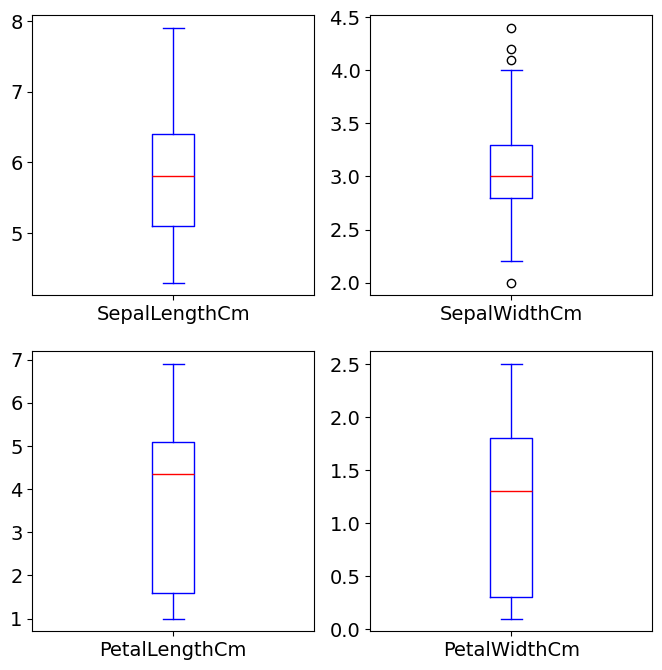

In [8]:
boxplot=iris_data.plot(kind='box', subplots=True, layout=(2,2),
                       sharex=False, sharey=False, colormap='bwr', figsize=(8,8))

In [9]:
numerical_subset = iris_data.select_dtypes(include=np.number)
numerical_subset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


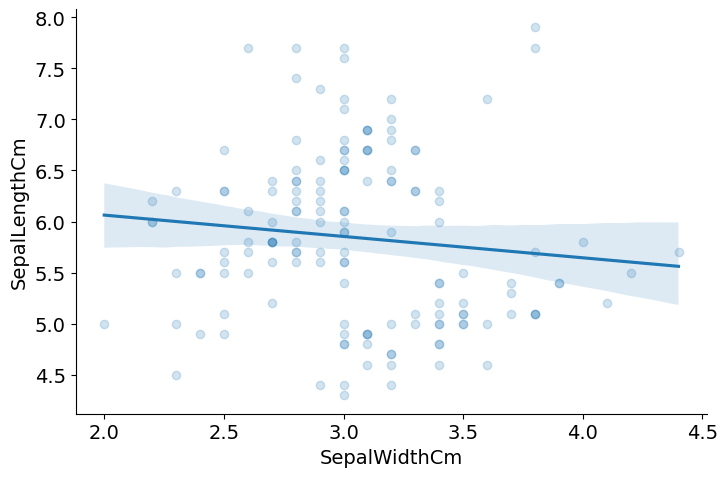

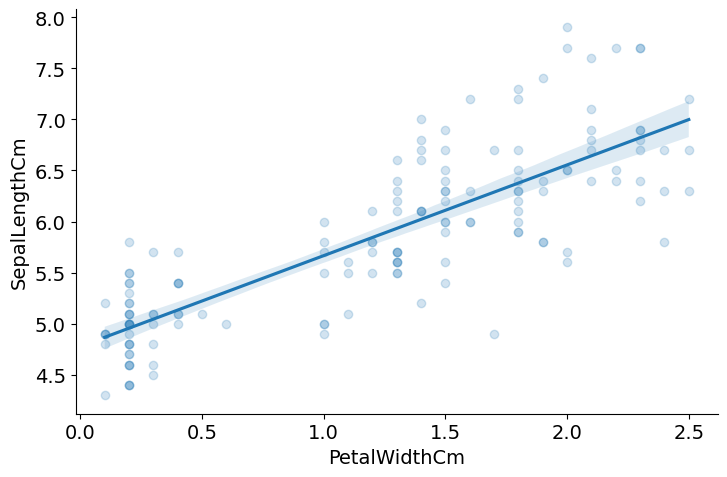

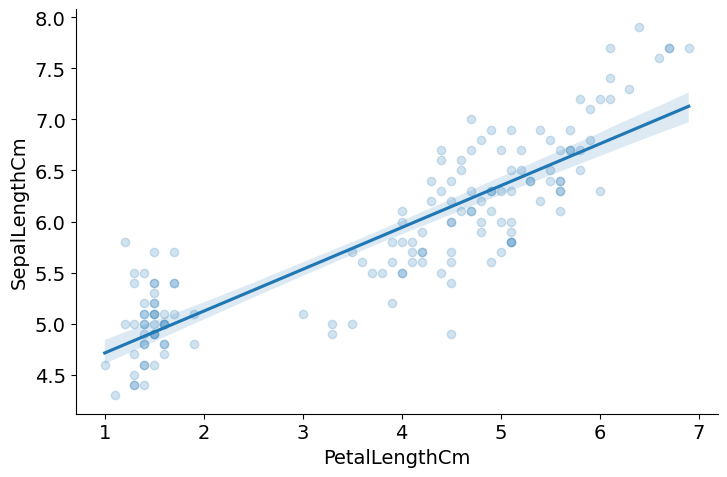

In [10]:
a=sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
b=sns.lmplot(x='PetalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
c=sns.lmplot(x='PetalLengthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})

In [11]:
input_cols = ['SepalWidthCm']
output_variable = ['SepalLengthCm']
X = iris_data[input_cols]
Y = iris_data[output_variable]

In [12]:
linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression()

In [13]:
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print('Sepal.length = -0.2088*Sepal.Width + 6.481')
print('\n')
print('Holding constant fixed, a 1 centimeter increase in sepalwidth lead to a decrease in Sepalength by 0.208centimeter')

[6.48122321]
[[-0.20887029]]


Sepal.length = -0.2088*Sepal.Width + 6.481


Holding constant fixed, a 1 centimeter increase in sepalwidth lead to a decrease in Sepalength by 0.208centimeter


In [22]:
input_cols = ['PetalLengthCm', 'SepalWidthCm']
output_variable = ['SepalLengthCm']
X = iris_data[input_cols]
y = iris_data[output_variable]
y=iris_data['SepalLengthCm']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


In [27]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [34]:
print ('R-Squared for training dataset model:', model.score(X_train,y_train))

R-Squared for training dataset model: 0.8342913726297885


In [35]:
## Predicting the x_test with the model
predicted=model.predict(X_test)

In [36]:
# Input variable petallength and Sepal width

print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.24397281467906037
MSE: 0.09431993312135639
RMSE: 0.30711550452778574


In [37]:
print(metrics.r2_score(y_test,predicted))

0.8447727117366579


Linear Regresion with Dummy Variables

In [38]:
iris_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [39]:
# create dummy variables
Species_dummies = pd.get_dummies(iris_data.Species, prefix='Species')

# print 5 random rows from seed value 12
Species_dummies.sample(n=5, random_state=12)

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
40,True,False,False
146,False,False,True
38,True,False,False
99,False,True,False
143,False,False,True


In [42]:
Species_dummies1 = Species_dummies.replace({True: 1, False: 0})

<ipython-input-42-114d1717a0dc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Species_dummies1 = Species_dummies.replace({True: 1, False: 0})


In [43]:
Species_dummies1

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [44]:
Species_dummies1.drop(Species_dummies1 .columns[0], axis=1, inplace=True)
iris_data = pd.concat([iris_data, Species_dummies1], axis=1)
iris_data.head()
#iris_data.sample(n=5, random_state=12)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-versicolor,Species_Iris-virginica
0,5.10,3.50,1.40,0.20,Iris-setosa,0,0
1,4.90,3.00,1.40,0.20,Iris-setosa,0,0
2,4.70,3.20,1.30,0.20,Iris-setosa,0,0
3,4.60,3.10,1.50,0.20,Iris-setosa,0,0
4,5.00,3.60,1.40,0.20,Iris-setosa,0,0


In [45]:
numerical_subset1 = iris_data.select_dtypes(include=np.number)
numerical_subset1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
SepalLengthCm,1.00,-0.11,0.87,0.82,0.08,0.64
SepalWidthCm,-0.11,1.00,-0.42,-0.36,-0.46,-0.13
PetalLengthCm,0.87,-0.42,1.00,0.96,0.20,0.72
PetalWidthCm,0.82,-0.36,0.96,1.00,0.12,0.77
Species_Iris-versicolor,0.08,-0.46,0.20,0.12,1.00,-0.50
Species_Iris-virginica,0.64,-0.13,0.72,0.77,-0.50,1.00


In [46]:
feature_dummies1 =['PetalLengthCm', 'SepalWidthCm']

# create X and y
X = iris_data[feature_dummies1]
y = iris_data['Species_Iris-versicolor']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [48]:
print (linreg.intercept_)
print (list(zip(feature_dummies1, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of Sepallength

print('Predicted value of Sepal length:', y_pred)

2.035347737548822
[('PetalLengthCm', np.float64(-0.008368331469692401)), ('SepalWidthCm', np.float64(-0.5465217170149975))]


Predicted value of Sepal length: [ 1.11642897e-01  6.27201788e-01  3.84903756e-01  4.70776771e-01
  2.37105087e-01  3.49756763e-01  1.31984910e-01  1.64621402e-01
  3.44735765e-01  2.17599908e-01  3.58125095e-01 -1.06965790e-01
  1.64621402e-01  6.64887389e-04  2.47147085e-01  2.36268254e-01
  6.20507122e-01  3.60635594e-01  1.65458236e-01  6.28038621e-01
  3.84066922e-01  4.71613604e-01  4.64918939e-01  4.12777267e-01
  1.61274070e-01  3.52267263e-01  3.53940929e-01  5.77570615e-01
  1.63784569e-01  7.67468958e-01  1.10806064e-01  6.92732790e-01
  4.03572102e-01 -2.71759138e-01  5.17060611e-01 -3.81900315e-01
  4.20308765e-01  6.91895957e-01 -1.60781128e-01  7.99526634e-01
  6.43938451e-01  1.63784569e-01  4.38719094e-01 -5.39872843e-02
  3.84066922e-01]


In [50]:
feature_dummies2 =['PetalLengthCm', 'PetalWidthCm']

# create X and y
X = iris_data[feature_dummies2]
y = iris_data['Species_Iris-virginica']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)



# print the coefficients
print (linreg.intercept_)
print (list(zip(feature_dummies2, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of Sepallength

print('Predicted value:', y_pred)

print('\n')

print('This model is not effective due to multicollinearity b/w the independent variables, petal length and width.')

-0.171936645745273
[('PetalLengthCm', np.float64(-0.06407407915940296)), ('PetalWidthCm', np.float64(0.6260415656368687))]


Predicted value: [-0.06742048  0.69717193 -0.13002464  0.37921367  0.88992189  0.60253074
  0.92195893 -0.14283945  0.87710707  0.0321582   0.47879235 -0.00481632
 -0.01763114 -0.01763114  0.40337337  0.5704937   0.58330851  0.49801457
 -0.07382789  0.45316271 -0.13643204  0.38562107  0.64738259  0.47879235
 -0.16846908  0.93477374  0.57196362  0.29738728 -0.14924686 -0.06742048
 -0.07382789  0.21703083  0.59612333 -0.13643204  0.69076453 -0.01763114
  0.4112507   0.27322758 -0.12361723  0.1978086   0.32448684 -0.02403855
 -0.13643204 -0.08023529 -0.1990362 ]


This model is not effective due to multicollinearity b/w the independent variables, petal length and width.


In [52]:
print ('R-Squared for training dataset model:', linreg.score(X_train,y_train))

R-Squared for training dataset model: 0.5929996436049538


In [53]:
## Predicting the x_test with the model
predicted=linreg.predict(X_test)

In [54]:
print(metrics.r2_score(y_test,predicted))

0.5819930267239226
